In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [41]:
import seaborn as sns

In [42]:
data_gpp = pd.read_csv("C:/Users/icoddington/OneDrive - World Justice Project/EU Subnational/EU-S Data/reports/eu-thematic-reports/data-viz/output/data4web_gpp.csv")
data_qrq = pd.read_csv("C:/Users/icoddington/OneDrive - World Justice Project/EU Subnational/EU-S Data/reports/eu-thematic-reports/data-viz/output/data4web_qrq.csv")
variance = pd.read_csv("C:/Users/icoddington/OneDrive - World Justice Project/EU Subnational/EU-S Data/reports/eu-thematic-reports/data-viz/output/variance_analysis.csv")
economic_dev = pd.read_excel("C:/Users/icoddington/Downloads/GPP_QRQ_TPS database.xlsx", sheet_name = 'Sheet 1')
master_gpp_country = pd.read_csv("C:/Users/icoddington/DOwnloads/master_gpp_country.csv")
fintight = pd.read_csv("C:/Users/icoddington/DOwnloads/fintight_national.csv")

In [43]:
# join santi's data w/ qrq
cols = ['DEV_FINAL_DEVCAT', 'country']
data_qrq = data_qrq.loc[
    data_qrq['level'] == 'national'
]
economic_dev = economic_dev[cols]
economic_dev = pd.merge(economic_dev, data_qrq, on = 'country')

In [ ]:
economic_dev

In [30]:
print(economic_dev['pillar'].unique())

[ 1  2  3  4  5  6  8  9 10]


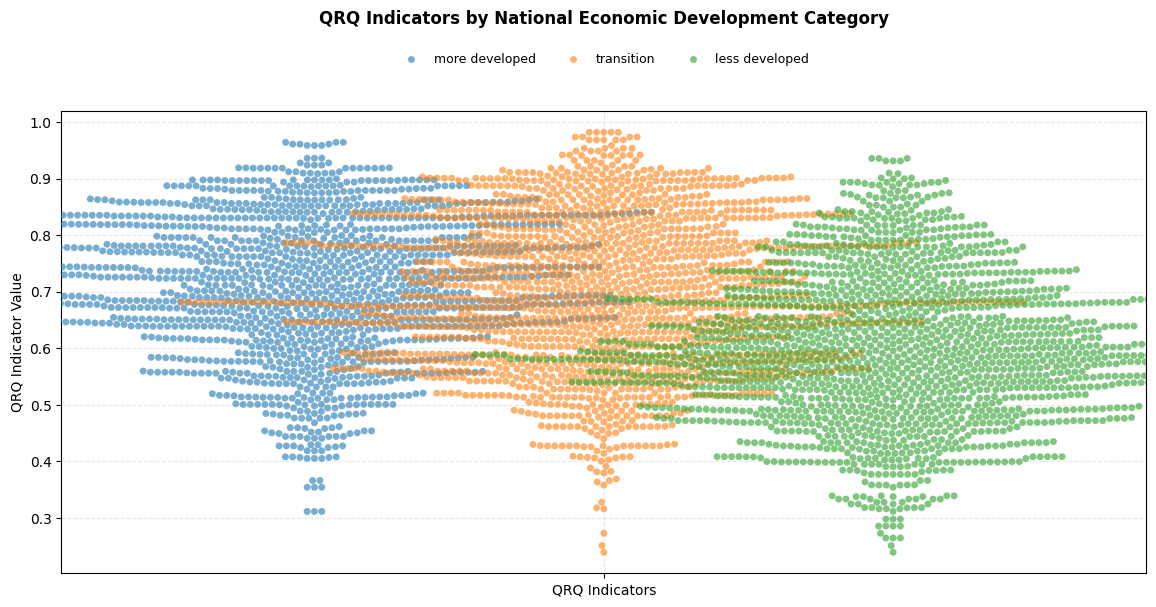

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (14,6))

# Create a single category for the x-axis while coloring by 'DEV_FINAL_DEVCAT'
sns.swarmplot(data=economic_dev, x=["QRQ Indicators"] * len(economic_dev), 
              y="score", hue="DEV_FINAL_DEVCAT", dodge=True, alpha=0.6)

# Title and labels
plt.xlabel("")
plt.ylabel("QRQ Indicator Value")
plt.text(0.5, 1.2, 'QRQ Indicators by National Economic Development Category', 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

# Customize legend position and grid
plt.legend(title=None, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.3)

plt.show()


C:\Users\icoddington\AppData\Local\Temp\ipykernel_32296\3193117812.py:9: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=economic_dev, x="DEV_FINAL_DEVCAT", y="score", hue="pillar",
C:\Users\icoddington\AppData\Local\Temp\ipykernel_32296\3193117812.py:13: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=economic_dev, x="DEV_FINAL_DEVCAT", y="score", hue="pillar",


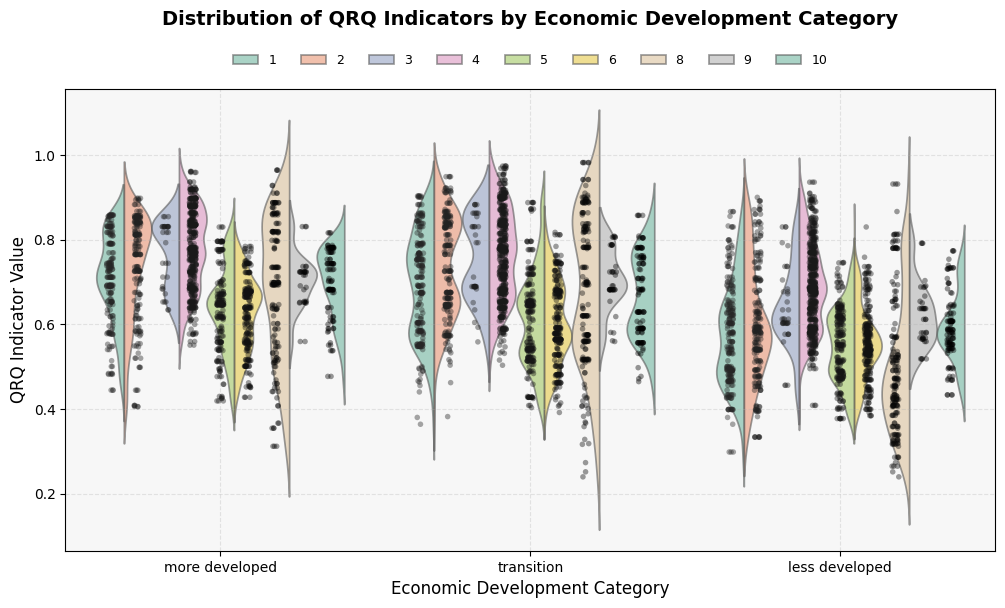

In [54]:
# visualization two. violin plot of qrq scores by pillar and economic development stage overlayed with scatter distribution. 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Violin plot with custom colors and transparency
sns.violinplot(data=economic_dev, x="DEV_FINAL_DEVCAT", y="score", hue="pillar", 
               split=True, inner=None, palette="Set2", scale="width", alpha=0.6)

# Overlay scatter plot for data points
sns.stripplot(data=economic_dev, x="DEV_FINAL_DEVCAT", y="score", hue="pillar", 
              dodge=True, jitter=True, color="black", marker="o", alpha=0.4, size=4, legend=False)

# Title and labels
plt.title("")
plt.xlabel("Economic Development Category", fontsize=12)
plt.ylabel("QRQ Indicator Value", fontsize=12)
plt.text(0.5, 1.15, 'Distribution of QRQ Indicators by Economic Development Category', 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=14, fontweight='bold')

# Legend positioning and adjustments
plt.legend(title=None, bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=10, frameon=False, fontsize=9)

# Grid and background tweaks
plt.grid(True, linestyle="--", alpha=0.3)
plt.gca().set_facecolor('#f7f7f7')  # Light background color for contrast

plt.show()



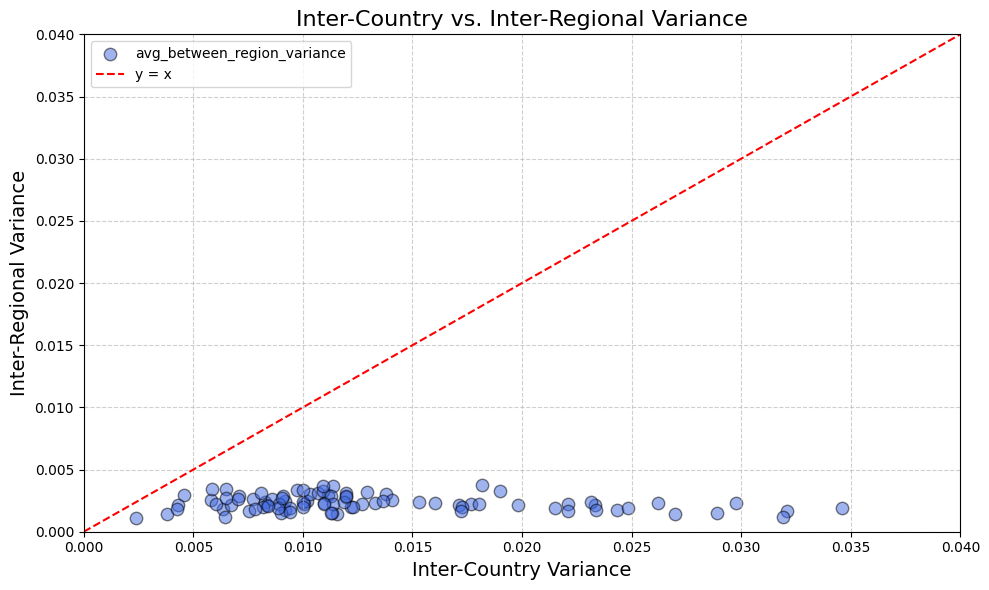

In [8]:
# visualization three. scatterplot of between region variance vs between country variance for all indicators
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))


plt.scatter(
    x="between_countries_var", 
    y="avg_between_region_variance", 
    data=variance,
    color="royalblue", 
    alpha=0.5, 
    edgecolor="k", 
    s=80  # Size of markers
)

# Add y = x line
plt.plot([0, 0.04], [0, 0.04], 'r--', linewidth=1.5, label="y = x")

plt.xlim(0, 0.04)
plt.ylim(0, 0.04)

plt.xlabel('Inter-Country Variance', fontsize=14)
plt.ylabel('Inter-Regional Variance', fontsize=14)
plt.title('Inter-Country vs. Inter-Regional Variance', fontsize=16)

plt.grid(True, linestyle="--", alpha=0.6)

plt.legend(loc="upper left")

plt.tight_layout()
plt.show()


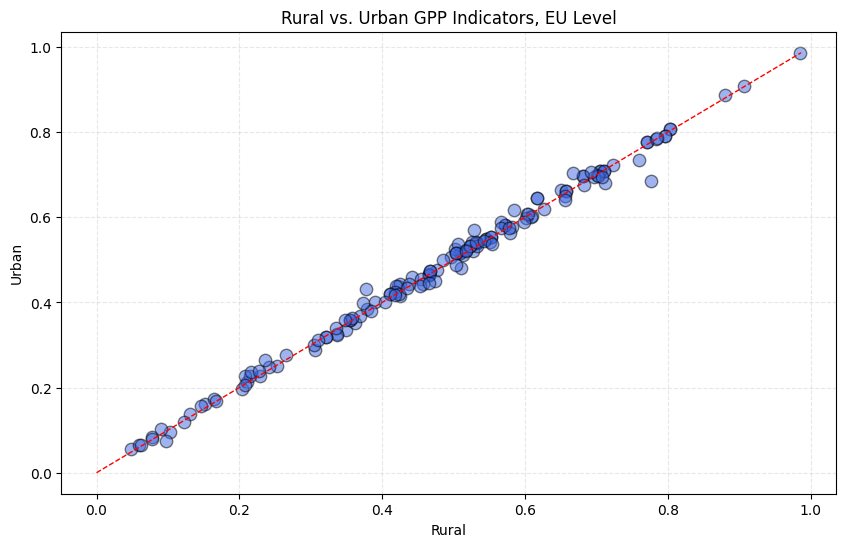

In [9]:
rural_vs_urban_eu = data_gpp.loc[
    (data_gpp['demographic'].isin(['Rural', 'Urban'])) &
    (data_gpp['level'] == 'eu')
]

# there are multiple rural / urban scores per id. 
pivoted_data = rural_vs_urban_eu.pivot(index=['id', 'section'], columns='demographic', values='value').reset_index()

# Scatter plot of Rural vs Urban scores
plt.figure(figsize=(10, 6))
plt.scatter(
    x="Rural", 
    y="Urban", 
    data=pivoted_data,
    color="royalblue", 
    alpha=0.5, 
    edgecolor="k", 
    s=80  
)

# Add a 45-degree reference line for comparison
max_score = max(pivoted_data['Rural'].max(), pivoted_data['Urban'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)

# Adding labels and title
plt.title("Rural vs. Urban GPP Indicators, EU Level")
plt.xlabel("Rural")
plt.ylabel("Urban")
plt.grid(True, linestyle="--", alpha=0.3)

plt.show()


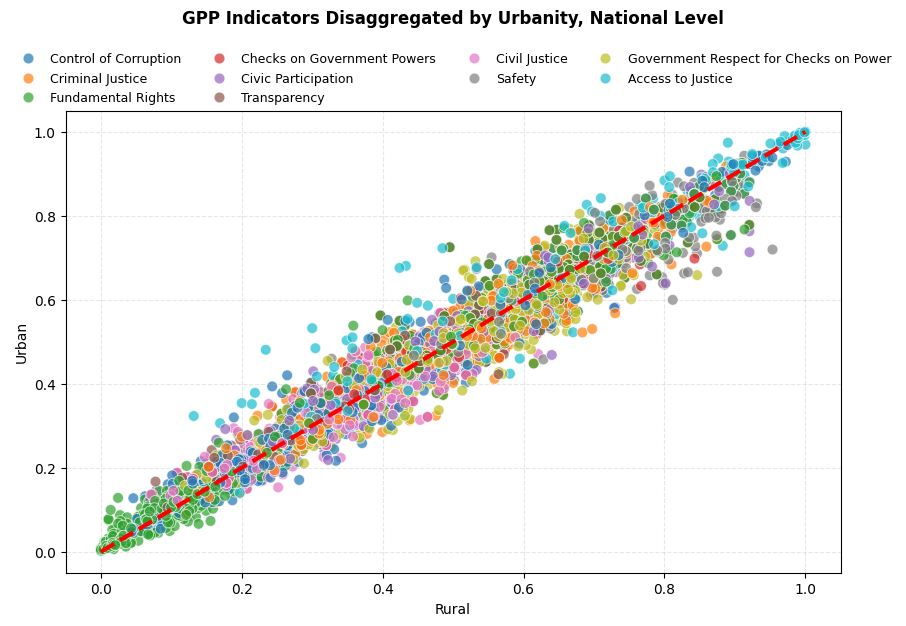

In [11]:
rural_vs_urban_national = data_gpp.loc[
    (data_gpp['demographic'].isin(['Rural', 'Urban'])) &
    (data_gpp['level'] == 'national')
]

pivoted_data = rural_vs_urban_national.pivot(index=['nuts_id','id', 'section'], columns='demographic', values='value').reset_index()

# make the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Rural', 
    y='Urban', 
    data=pivoted_data, 
    hue='section',  
    s=60,  
    alpha=0.7,  
)


# reference line
max_score = max(pivoted_data['Rural'].max(), pivoted_data['Urban'].max())
plt.plot([0, max_score], [0, max_score], color='grey', linestyle='--', linewidth=3)


# aesthetics
plt.title("")
plt.xlabel("Rural")
plt.ylabel("Urban")
plt.grid(True, linestyle="--", alpha=0.3)
plt.text(0.5, 1.2, 'GPP Indicators Disaggregated by Urbanity, National Level', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 4, frameon = False, fontsize = 9)


plt.show()


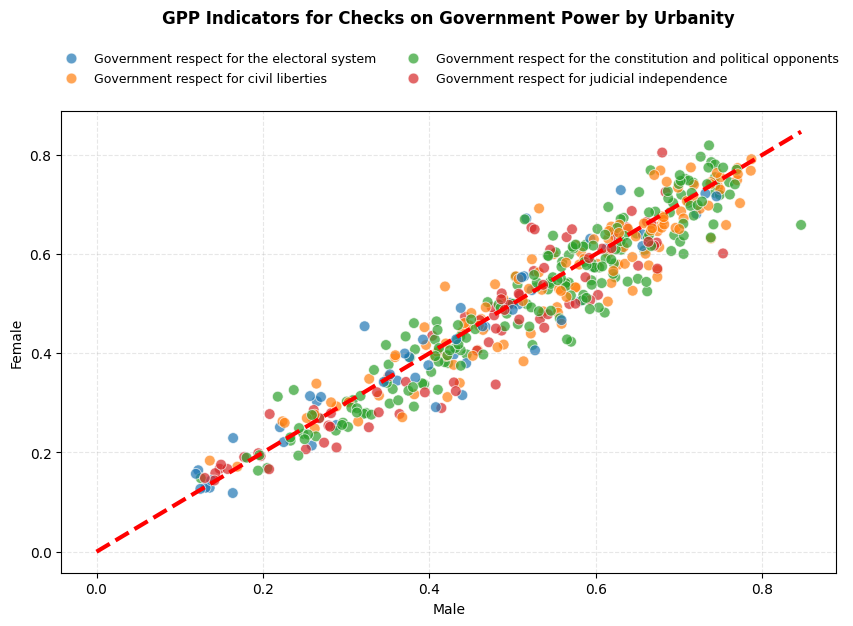

In [12]:
# filter by least difference at national level
# filter by significant differences (topics)
urban_signif = rural_vs_urban_national.loc[
    (rural_vs_urban_national['section'].isin(['Government Respect for Checks on Power']))
]

pivoted_data = urban_signif.pivot(index=['nuts_id','id', 'subsection'], columns='demographic', values='value').reset_index()

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Rural', 
    y='Urban', 
    data=pivoted_data, 
    hue='subsection', 
    s=60,  
    alpha=0.7,  
)
# Add a 45-degree reference line for comparison
max_score = max(pivoted_data['Rural'].max(), pivoted_data['Urban'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=3)

# Adding labels and title
plt.title("")
plt.xlabel("Male")
plt.ylabel("Female")
plt.text(0.5, 1.2, 'GPP Indicators for Checks on Government Power by Urbanity', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 2, frameon = False, fontsize = 9)
plt.grid(True, linestyle="--", alpha=0.3)


plt.show()


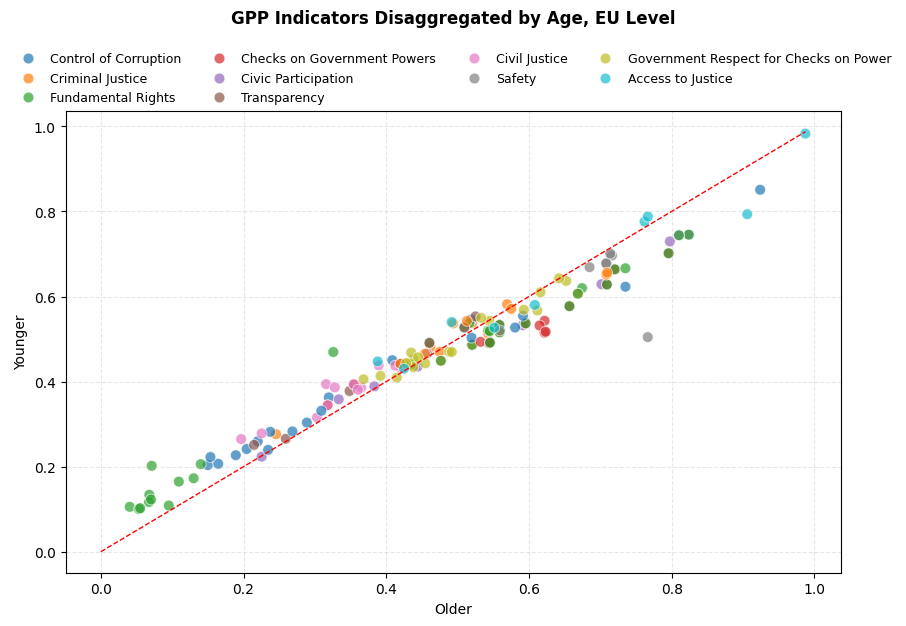

In [13]:
# age
# Filter and create a copy to avoid SettingWithCopyWarning
age_eu = data_gpp.loc[
    (data_gpp['demographic'].isin(["18-24", "25-34", "35-44", "45-54", "55-64", "+65"])) &
    (data_gpp['level'] == 'eu')
].copy()  # Use .copy() to avoid chained assignment issues

# Safely add the 'young' column with .loc
age_eu.loc[:, 'young'] = age_eu['demographic'].isin(['18-24', '25-34'])


# Aggregate to remove duplicates by averaging
age_eu_agg = age_eu.groupby(['nuts_id', 'id', 'section', 'young'])['value'].mean().reset_index()

# Now pivot without duplicates
pivoted_data = age_eu_agg.pivot(index=['nuts_id', 'id', 'section'], columns='young', values='value').reset_index()
pivoted_data.columns = ['nuts_id', 'id', 'section', 'Older', 'Younger']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Older', 
    y='Younger', 
    data=pivoted_data, 
    hue='section',  # Use 'section' for the color
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
)


# reference line
max_score = max(pivoted_data['Older'].max(), pivoted_data['Younger'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)


# aesthetics
plt.title("")
plt.xlabel("Older")
plt.ylabel("Younger")
plt.grid(True, linestyle="--", alpha=0.3)
plt.text(0.5, 1.2, 'GPP Indicators Disaggregated by Age, EU Level', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 4, frameon = False, fontsize = 9)

plt.show()

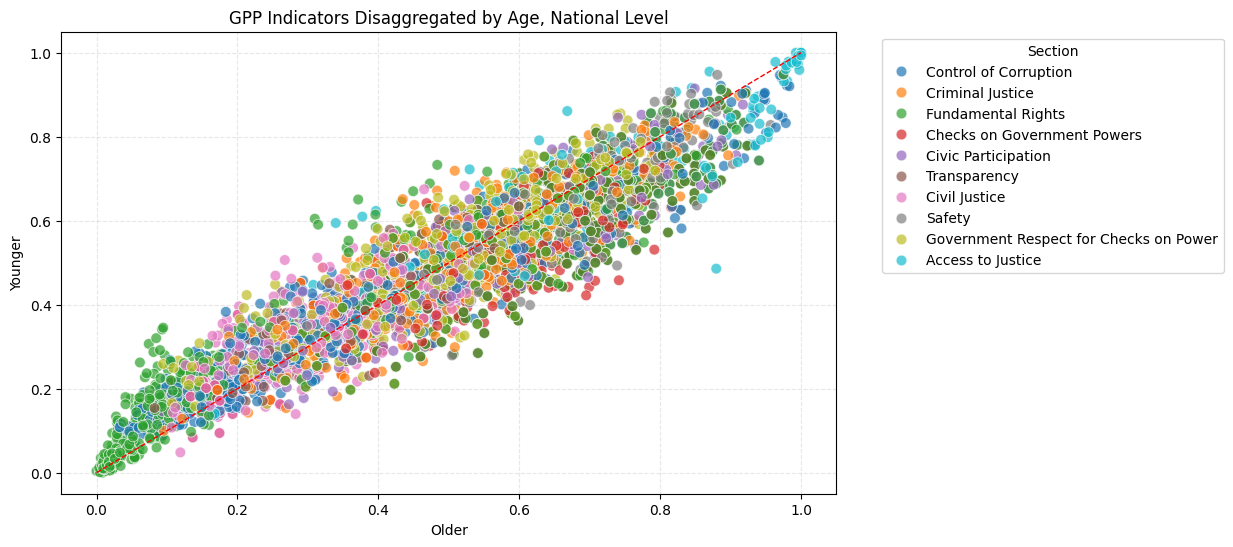

In [114]:
# Filter and create a copy to avoid SettingWithCopyWarning
age_national = data_gpp.loc[
    (data_gpp['demographic'].isin(["18-24", "25-34", "35-44", "45-54", "55-64", "+65"])) &
    (data_gpp['level'] == 'national')
].copy()  

# Safely add the 'young' column with .loc
age_national.loc[:, 'young'] = age_national['demographic'].isin(['18-24', '25-34'])


# Aggregate to remove duplicates by averaging
age_national_agg = age_national.groupby(['nuts_id', 'id', 'section', 'young'])['value'].mean().reset_index()

# Now pivot without duplicates
pivoted_data = age_national_agg.pivot(index=['nuts_id', 'id', 'section'], columns='young', values='value').reset_index()
pivoted_data.columns = ['nuts_id', 'id', 'section', 'Older', 'Younger']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Older', 
    y='Younger', 
    data=pivoted_data, 
    hue='section',  # Use 'section' for the color
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
)


# reference line
max_score = max(pivoted_data['Older'].max(), pivoted_data['Younger'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)


# aesthetics
plt.title("")
plt.xlabel("Older")
plt.ylabel("Younger")
plt.grid(True, linestyle="--", alpha=0.3)
plt.text(0.5, 1.2, 'GPP Indicators Disaggregated by Age, National Level', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')
plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 4, frameon = False, fontsize = 9)



plt.show()

In [177]:
# filter by significant differences (topics)
age_national_agg = age_national.groupby(['nuts_id', 'id', 'subsection', 'young'])['value'].mean().reset_index()

age_signif = age_national_agg.loc[
    (age_national['section'].isin(['Checks on Government Power' ]))
]

pivoted_data = age_national_agg.pivot(index=['nuts_id', 'id', 'subsection'], columns='young', values='value').reset_index()
pivoted_data.columns = ['nuts_id', 'id', 'section', 'Older', 'Younger']

# Scatter plot of Rural vs Urban scores
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Older', 
    y='Younger', 
    data=pivoted_data, 
    hue='subsection',  # Use 'section' for the color
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
)
# Add a 45-degree reference line for comparison
max_score = max(pivoted_data['Older'].max(), pivoted_data['Younger'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)

# Adding labels and title
plt.title("GPP Indicators for Checks on Govt Power Disagreggated by Age")
plt.xlabel("Older")
plt.ylabel("Younger")
plt.show()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

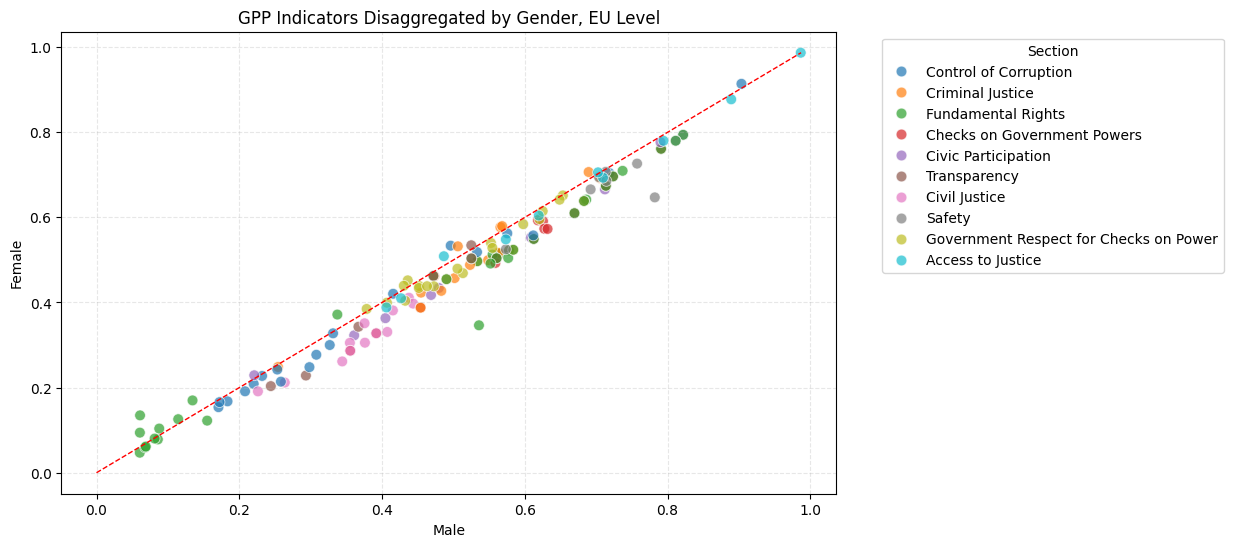

In [178]:
# gender
gender_eu = data_gpp.loc[
    (data_gpp['demographic'].isin(['Male', 'Female'])) &
    (data_gpp['level'] == 'eu')
]

pivoted_data = gender_eu.pivot(index=['id', 'section'], columns='demographic', values='value').reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Male', 
    y='Female', 
    data=pivoted_data, 
    hue='section',  # Use 'section' for the color
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
)


# reference line
max_score = max(pivoted_data['Male'].max(), pivoted_data['Female'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)


# aesthetics
plt.title("GPP Indicators Disaggregated by Gender, EU Level")
plt.xlabel("Male")
plt.ylabel("Female")
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

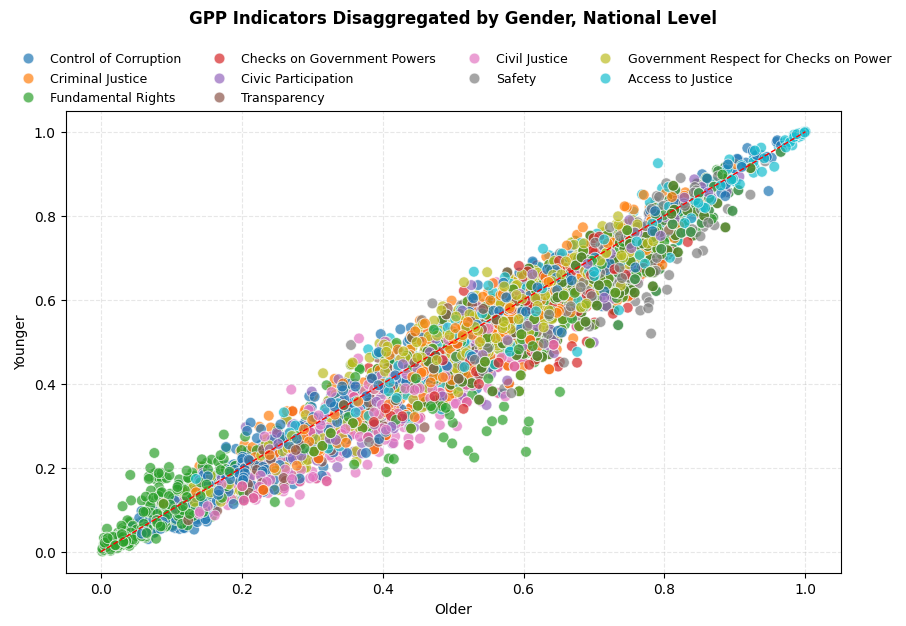

In [192]:
gender_national = data_gpp.loc[
    (data_gpp['demographic'].isin(['Male', 'Female'])) &
    (data_gpp['level'] == 'national')
]

# there are multiple rural / urban scores per id. 
pivoted_data = gender_national.pivot(index=['nuts_id','id', 'section'], columns='demographic', values='value').reset_index()

# Scatter plot of Rural vs Urban scores
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Male', 
    y='Female', 
    data=pivoted_data, 
    hue='section',  # Use 'section' for the color
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
)


# reference line
max_score = max(pivoted_data['Male'].max(), pivoted_data['Female'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)


# aesthetics
plt.title("")
plt.xlabel("Older")
plt.ylabel("Younger")
plt.grid(True, linestyle="--", alpha=0.3)
plt.text(0.5, 1.2, 'GPP Indicators Disaggregated by Gender, National Level', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 4, frameon = False, fontsize = 9)


plt.show()

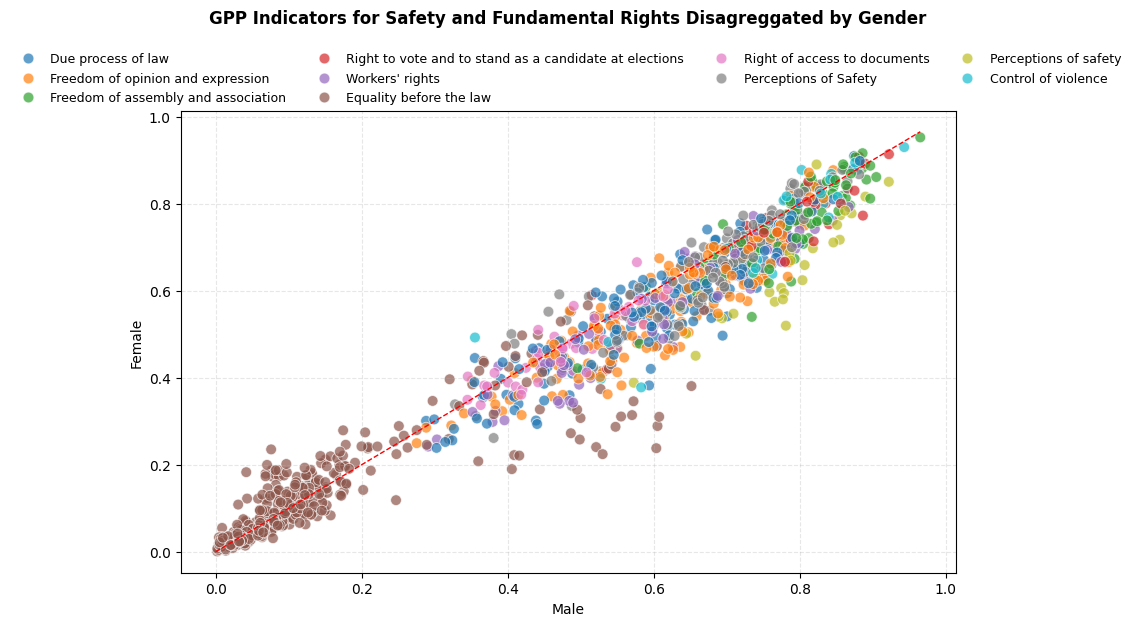

In [194]:
# filter by significant differences (topics)
gender_signif = gender_national.loc[
    (gender_national['section'].isin(['Safety', 'Fundamental Rights' ]))
]

# there are multiple rural / urban scores per id. 
pivoted_data = gender_signif.pivot(index=['nuts_id','id', 'subsection'], columns='demographic', values='value').reset_index()

# Scatter plot of Rural vs Urban scores
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Male', 
    y='Female', 
    data=pivoted_data, 
    hue='subsection', 
    s=60,  
    alpha=0.7,  
)
# Add a 45-degree reference line for comparison
max_score = max(pivoted_data['Male'].max(), pivoted_data['Female'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)

# Adding labels and title
plt.title("")
plt.xlabel("Male")
plt.ylabel("Female")
plt.grid(True, linestyle="--", alpha=0.3)

plt.text(0.5, 1.2, 'GPP Indicators for Safety and Fundamental Rights Disagreggated by Gender', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold')

plt.legend(title = None, loc = 'upper center', bbox_to_anchor = (0.5, 1.15), ncol = 4, frameon = False, fontsize = 9)
plt.show()

In [51]:
fintight_gpp_section_cols = ['country', 'nuts_id','section', 'subsection']
fintight_gpp_section = data_gpp[fintight_gpp_section_cols]
long_data.head()

,country_name_ltn,fintight,nuts_id,JSE_polinfluence,JSE_indjudges,LEP_indprosecutors,LEP_accountability,LEP_bribesreq,LEP_bribesacc,LEP_accusation,...,ORC_citizen_fight,ORC_govtefforts,ORC_impartial_measures,ORC_pconnections,ATC_embezz_priv,ATC_recruitment_public,IPR_easy2find,IPR_easy2find_online,TRT_govt_local,TRT_govt_national
0,Austria,0.0,AT,0.140268,0.180383,0.174108,0.225038,0.208343,0.208835,0.209028,...,0.161167,0.050030,0.068332,0.239286,0.317181,0.202436,0.181335,0.140459,NaN,NaN
1,Austria,1.0,AT,0.088232,0.115266,0.120876,0.180359,0.177301,0.159893,0.173024,...,0.136901,0.053243,0.074887,0.251948,0.295498,0.201638,0.161587,0.117720,NaN,NaN
3,Belgium,0.0,BE,0.116365,0.126528,0.138631,0.218711,0.211001,0.222376,0.209006,...,0.222662,0.074082,0.090271,0.194845,0.308711,0.227163,0.213883,0.131068,NaN,NaN
4,Belgium,1.0,BE,0.095776,0.113333,0.112125,0.166850,0.199458,0.210612,0.174579,...,0.204569,0.077822,0.090768,0.220662,0.284644,0.221672,0.192891,0.126132,NaN,NaN
6,Bulgaria,0.0,BG,0.055567,0.044519,0.084884,0.203295,0.199486,0.172038,0.204479,...,0.104396,0.040949,0.035860,0.245946,0.310338,0.264923,0.173154,0.109754,NaN,NaN


In [49]:
# fintight
fintight_gpp_section_cols = ['country', 'nuts_id','section', 'subsection']
fintight_gpp_section = data_gpp[fintight_gpp_section_cols]
fintight = fintight.dropna(subset=['fintight'])

long_data = fintight.melt(id_vars=['country_name_ltn', 'nuts_id', 'fintight'],
                      var_name='target', value_name='value')
long_data = pd.merge(long_data, fintight_gpp_section, on = 'nuts_id')

# Step 2: Pivot to create separate columns for `fintight == 0` and `fintight == 1` values
pivoted_data = long_data.pivot_table(
    index=['country_name_ltn', 'nuts_id', 'target'],
    columns='fintight',
    values='value',
    aggfunc='first'  # Use 'first' in case there are no duplicates
).reset_index()

# Rename the columns for clarity
pivoted_data.columns = ['country_name_ltn', 'nuts_id', 'target', 'fintight_0_value', 'fintight_1_value']

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='fintight_0_value', 
    y='fintight_1_value', 
    data=pivoted_data,
    s=60,  # Size of points
    alpha=0.7,  # Transparency for points
    hue = 'section'
)
# Add a 45-degree reference line for comparison
max_score = max(pivoted_data['fintight_0_value'].max(), pivoted_data['fintight_1_value'].max())
plt.plot([0, max_score], [0, max_score], color='red', linestyle='--', linewidth=1)

# Adding labels and title
plt.title("GPP Indicators Disagreggated by Financial Situation")
plt.xlabel("Financially Stable")
plt.ylabel("Financially Unstable")
plt.show()

ValueError: Could not interpret value `section` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [167]:
# master gpp country
import plotly.graph_objects as go

# Sorting countries for cleaner visualization (optional)
data = master_gpp_country.sort_values(by='TRT_govt_national', ascending=True)

# Initialize the figure
fig = go.Figure()

# Define colors for the markers
color_local = '#D0DB97'  # Light color for Local
color_national = '#254D32'  # Dark color for National

# Add lines connecting the local and national values with conditional coloring
for i, row in data.iterrows():
    # Determine the line color based on which value is higher
    line_color = color_local if row['TRT_govt_local'] > row['TRT_govt_national'] else color_national
    
    fig.add_trace(go.Scatter(
        x=[row['TRT_govt_local'] * 100, row['TRT_govt_national'] * 100],
        y=[row['country_name_ltn'], row['country_name_ltn']],
        mode='lines',
        line=dict(color=line_color, width=2),
        showlegend=False
    ))

# Add markers for local values
fig.add_trace(go.Scatter(
    x=data['TRT_govt_local'] * 100,
    y=data['country_name_ltn'],
    mode='markers',
    marker=dict(color=color_local, size=8),
    name='Local'
))

# Add markers for national values
fig.add_trace(go.Scatter(
    x=data['TRT_govt_national'] * 100,
    y=data['country_name_ltn'],
    mode='markers',
    marker=dict(color=color_national, size=8),
    name='National'
))

# Customize layout
fig.update_layout(
    title='Most EU countries exhibit a higher trust in local authorities',
    xaxis_title='Percentage (%)',
    yaxis_title='',  
    plot_bgcolor='white',
    height=600,
    width=800,
    xaxis=dict(showgrid=True, gridcolor='lightgrey', gridwidth=1, range = [0,100]),  
    legend=dict(
        orientation="h",  
        yanchor="bottom",
        y=1.05,
        xanchor="left",
        x=0,
        title_text=None ,
        font = dict(size = 10) 
    ),
     annotations=[
        dict(
            x=0.5,
            y=1.05,  
            xref='paper',
            yref='paper',
            showarrow=False,
            text='Percentage of people who reported a lot or some trust in public officials working in the national and local goverment.',
            font=dict(size=9)
        )
    ]
)

fig.show()

 

